# অন্য  স্নায়ুতন্ত্র । An alternative neural network

## পরীক্ষিত সান্যাল | Parikshit Sanyal

The nervous system is biological, but there is no reason it can't be simulated in my computer. Among other things, it provides the ultimate introspection, which I think what programming is all about.

In this notebook, we will simulate a nervous systems made of 'neurons' modeled after how actual biological neurons work. We will abhor the holistic approach usually taken in biology and use the reductionistic approach of physical sciences.

স্নায়ুতন্ত্রের উৎপত্তি জীববিদ্যা থেকে, কিন্তু সেখানেই আটকে থাকতে হবে এমন কোন শর্ত নেই । বরং জৈবিক স্নায়ুতন্ত্রের কিছু অসুবিধা আছে, যেগুলো হাতে তৈরি কৃত্রিম স্নায়ুতন্ত্রে খুব সহজেই কাটিয়ে ওঠা যায়  । আমার উদ্দেশ্য,

1. একটা কৃত্রিম স্নায়ুতন্ত্র তৈরি করে সমস্যা সমাধানে তার দক্ষতা বিচার; প্রোগ্রামিং এ কখনও এমন হয়, যে খুব সহজ কিছুর সমাধান করতে খুব প্যাঁচওয়া একটা অ্যালগোরিদম (বিবেকানন্দ যাকে বলতেন 'সাত পাতা বিশেষণের পর 'রাজা আসীৎ'), সেরকম কিছু সর্ব্বতঃ বর্জন করা ।
2. আমি যেহেতু নিজেই একটা স্নায়ুতন্ত্র, তাই খানিকটা আত্মবিশ্লেষণ । 

অতএব সামূহিক (holistic) ছেড়ে একান্তিক (reductionistic) -এ নেমে আসি ।

## স্নায়ু (Neuron)

A neuron is defined by its excitability, i.e. which can receive a stimulus (in our case, a current) and respond with another current. In this regard, it is not too dissimilar from a function, but a very specific one.

The _response_ of a neuron is measured by the changing voltage difference across its cell membrane. The precise mechanism of this change is a whole lot of biochemistry, and irrelevant to this discourse. What matters is, the voltage _v_ changes with time _t_. The differential

\begin{align}
dv/dt = 1/ \tau
\end{align}

represents the simplest neurone,  _tau_ being the constant which determines how slow the change ('depolarisation' in  biological terms) happens.


স্নায়ু এমন একটা কোষ যার মধ্যে উত্তেজিতা রয়েছে, অর্থাৎ যার কোষপর্দার এপাশ-ওপাশের বিভব প্রভেদ (v) বদলাতে পারে । যেকোন কিছুর মত, এই বদলের হার লেখা যায় dv/dt আকারে ; যেমন , কোন স্নায়ুর ক্ষেত্রে

\begin{align}
dv/dt = 1/ \tau
\end{align}
 
tau  ধ্রুবক , বিভব পরিবর্তনের হারের ব্যাস্তানুপাতিক । অর্থাৎ tau এর মান যত বেশি,  নিউরোন তত ধীরে উত্তেজিত (depolarize) হবে । 

This is the 'action potential' of a neurone, as inputs accumulate and ultimately it fires. The resting membrane potential of a neuron is -70 mV on average. The membrane potential must reach a threshold (in this case -55 mV) before it fires and does a certain 'action' (like moving a muscle, listening to a sound etc). After this little spark of 'action potential', the neuron becomes refractory for a while as it replenishes its supplies (remember that a neuron is a biological, not an electronic, entity)

ভূম্যাবস্থায় (ground state/ resting membrane potential এর বাংলা কি ?) যে বিভব থাকে -70 mV, খানিকটা সংবেদ পেয়ে তা যখন একটা নির্দিষ্ট বিভব চৌকাঠ (threshold) পেরয় তখন হঠাৎ, এক ঝটকায় অনেকটা তড়িচ্চালনা শুরু হয়, শারীরবিদ্যার বইতে যাকে action potential লেখে । আবার, একটা action potential এর পর  নিউরোন  খানিকক্ষণ অসাড় (refractory) হয়ে থাকে ।


In [ ]:
!pip install brian2
# We have used the brian2 library for modelling neurons in this workbook

     |████████████████████████████████| 1.1MB 4.8MB/s 
  Created wheel for brian2: filename=Brian2-2.2.2.1-cp36-cp36m-linux_x86_64.whl size=1264774 sha256=c3288ab8fb13241943f76bff633602a910cbf79121dc5150064499e92cb23ffc
  Stored in directory: /root/.cache/pip/wheels/81/01/01/524c9a3b7cbba4209654f333ed89890ca179485867c9ae5868
Successfully built brian2


In [ ]:
from matplotlib import pyplot as plt
from brian2 import *
plt.style.use('seaborn')

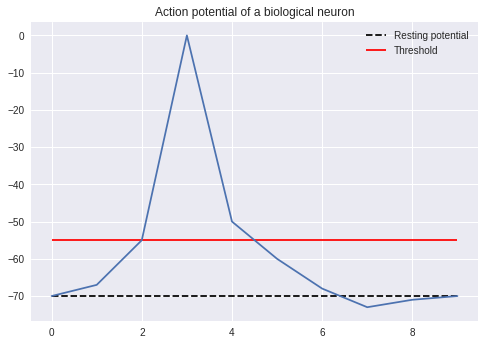

In [ ]:
# Data from an actual potential in peripheral nerves of the body
t = range(10) #ms
v = [-70,-67,-55,0,-50,-60,-68,-73,-71,-70]
plt.title('Action potential of a biological neuron')
plt.hlines(y=-70,xmin=0,xmax=9,linestyle='dashed',label='Resting potential')
plt.hlines(y=-55,xmin=0,xmax=9,color='r',label='Threshold')
plt.legend()
plt.plot(t,v)



### জৈবিক স্নায়ুর সুবিধা অসুবিধা | Problems with biological neurons

Our own neurons are biological, made of proteins and lipids, and not very good conductors. The way these neurons function is not movement of electrons, but much bigger Sodium, Potassium and Chloride ions. The mechanism is not very efficient, and thus there are strict limitations on what potentials might be achieved by a biological neuron. 

However, while simulating the neuron, we will follow biology only as much as is indispensable. The 'neurons' we make will be objects in computer memory, with a defined membrane potential. This potential might change only for two reasons

1. For neurons which are _receptors_ facing the external world (i.e. those in skin, ear, eyes etc), stimuli from the environment might change the potential

2. For every other kind of neuron, such stimuli may only come from another neuron

When a neuron develops an 'action potential' (i.e. a spark), it can either cause some definite biological action, or pass the potential to the next neurone as a stimulus.


আমার শরীরে যেসব স্নায়ু রয়েছে, তারা প্রোটিন আর লিপিড দিয়ে তৈরি, অতএব তারা তড়িৎ (ইলেকট্রন) পরিবহণে খুব একটা সুবিধা করতে পারেনা । তারা কোষপর্দার বিভব প্রভেদ পরিবর্তন করতে পারে একটাই উপায়ে - বাইরে থেকে বড় বড় আয়ন (যেমন Na+, Cl-) ভিতরে এনে/ বাইরে পাঠিয়েএবং কোনক্রমে একটা Nernst সাম্য প্রতিষ্ঠিত করে। কিন্তু, উত্তেজিতা পরিবহণ (conductance) ছাড়াও আমার স্নায়ুদের অন্য নানাদিক ভাবতে হয় । মূল ভাবনা, ব্যাঘ্রাচার্য্য বৃহল্লাঙ্গুল যাকে বলতেন 'বিষয়কর্ম', অর্থাৎ খাওয়াপরার ব্যাপারটা । খুব বেশী আয়নের নড়াচড়া কোষের পক্ষে ক্ষতিকর (একসাথে প্রচুর পরিমাণ সোডিয়াম আয়ন ঢুকে পড়লে স্নায়ুকোষ মরেই যাবে ) । তাই জৈবিক স্নায়ুতে যদৃচ্ছ বিভব নিয়ে নাড়াচাড়া করা যায়না । 

সৌভাগ্যবশত, আমার কম্পিউটারের এজাতীয় সমস্যা নেই । তাই আমি জৈবিক স্নায়ুকে অনুকরণ করব ততটাই, যতটা না হলে নয় । অর্থাৎ তার একটা পর্দা থাকবে, যার দুপাশে একটা প্রাথমিক (initial) বিভব প্রভেদ থাকবে (সেটা শূন্যও হতে পারে) । এই বিভব প্রভেদ বদলাতে পারে মাত্র দুটো কারণে

1. যে সমস্ত নিউরোন গ্রাহক (receptor), তারা বহির্বিশ্ব থেকে আসা সংবেদ (stimulus) এ বিভব প্রভেদ বদলাতে পারবে
2. বাকি সমস্ত নিউরোনের বিভব প্রভেদ বদলাবে শুধুমাত্র অন্য কোন নিউরোনের থেকে সংবেদ পেলে,

যখন এই বিভব প্রভেদ চৌকাঠ (threshold)পেরবে, তখন এতে action potential (AP) দেখা যাবে, এবং তার ফলস্বরূপ পরবর্তী নিউরোনে এই সংবেদ পৌঁছে যাবে

The following model replicates biological neurons, which are only the simplest mathematical functions that you can think of. Any stimulus which pushes them to threshold potential _k_ will make them fire (i.e. a produce an output 1). Nil otherwise.

Text(0, 0.5, 'mv')

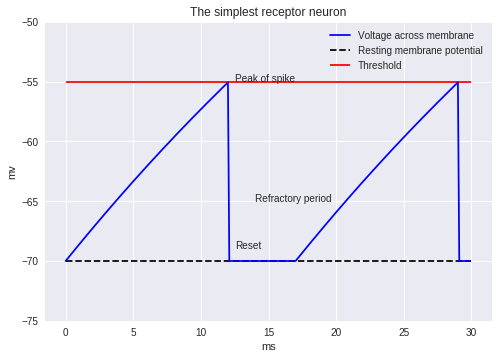

In [ ]:
%matplotlib inline
plt.style.use('seaborn')

# The simplest receptor neuron with a constant derivative, thus a straight line
# Vmax = maximum voltage which can be achieved
# একটি সহজ সাধারণ নিউরোন

start_scope()
eqs = '''
dv/dt = (Vmax-v)/tau : 1 (unless refractory)
Vmax : 1
tau : second
'''

simple_neuron = NeuronGroup(1, eqs, method='linear',refractory=5*ms,threshold = 'v>=-55', reset='v=-70')
# One neuron with the aforementioned differential equation, with a refractoriness of 5 ms after a spike, 
# threshold -55 mV and resting potential -70 mV

simple_neuron.v = -70 # Resting
simple_neuron.Vmax = 0 # The maximum voltage that can be reached by the neuron
simple_neuron.tau = 50*ms #Inversely proportional to rate of change
m_simple_neuron = StateMonitor(simple_neuron, 'v',record=True) # A monitor object to record voltages over time

# We now run the simulation plot voltage against time
run(30*ms)
plt.title("The simplest receptor neuron")
plot(m_simple_neuron.t/ms, m_simple_neuron.v[0], '-b', label='Voltage across membrane')
plt.text(12.5,-55,'Peak of spike')
plt.text(12.5,-69,'Reset')
plt.text (14,-65,'Refractory period')
plt.hlines(y=-70,xmin=0,xmax=30,label='Resting membrane potential',linestyle='dashed')
plt.hlines(y=-55,xmin=0,xmax=30,label='Threshold',color='r')
plt.ylim(-75,-50)
plt.legend()
xlabel("ms")
ylabel("mv")


What this graph shows is the change of voltage till the threshold _k_, when an action potential occurs, and the voltage drops to baseline ('resting membrane potential'), till it starts rising again (this is a 'receptor' neuron which is always being kindled by external stimuli). At -55 mV (threshold), a 'spike' occurs, i.e. the neuron 'lights up' and does some job. The voltage may or may not traverse upto Vmax once this spike happens, or the neuron might do something different altogether (like contracting a muscle/ secreting a hormone). **What matters is the voltage has reached thresholsd, and a spike has occured**.

This neuron is a 'receptor', which means it is exposed to external environment, thus continuously getting stimulated and generating spikes (at a rate 1 spike/ 15 ms). A stronger stimulus will cause it to fire at a faster rate (maybe 1 spike/ 10 ms). _Only the rate of firing changes_, all other variables are static (in fact, there _are_ no other variables) in a neuron.


এই ছবিতে threshold অব্দই পৌছনো দেখানো গেছে, তার কারণ একবার action potential শুরু হলে বিভব কোথায় চলে যাবে, বা আরও আনুষঙ্গিক কি কি ঘটনা ঘটবে তা এই ছবিতে দেখানোর কোন উপায় নেই । অর্থাৎ all or none ঘটনা হওয়ার কারণে action potential এর যে স্ফুলিঙ্গ, অর্থাৎ spike , তা এই ছবিতে দেখানোর প্রয়োজন নেই ।

এই বিশেষ নিউরোন হল একটা receptor, অর্থাৎ চোখ কান নাক ত্বকে যেমন থাকে। এরা সবসময়ই বাইরে থেকে কোন না কোন সংবেদ পাচ্ছে, তাই প্রতি ১৫ মিলিসেকেন্ডে একবার করে spike হচ্ছে । যদি সংবেদটা আরো জোরালো হয় (হঠাৎ ভীষণ জোর আলো চোখে এসে পড়ে), তাহলে হয়তো এটা হয়ে যাবে প্রতি ১০ মিলিসেকেন্ডে একবার ।  **প্রতি সেকেন্ডে কতবার spike হচ্ছে, শুধুমাত্র তাই দিয়েই নিউরোনের সংবেদের জোর ('প্রাবল্য') নির্ধারিত হয়** । এ ছাড়া অন্য কোন চল (variable) নিউরোনের মধ্য নেই ।


### কিছু প্রাথমিক নিয়ম

### Assumptions

1. We won't consider subcellular details in this neural network. We will use 'neurones' in their mathematical sense, i.e. stateless functions
2. We won't use any state variables apart from neurons themselves
3. The only thing that counts in a neuron is the number of times it fires (number of action potentials per second)


আমরা ধরে নেব যে

1. নিউরোন  এর চেয়ে ছোট কোন একক নেই । অর্থাৎ এই মডেলে আমরা  স্নায়ুকোষের ভিতরের  স্মৃতিকণা গুলোর (storage units , যেমন   নিউক্লিক অ্যাসিড, মাইটোকন্ড্রিয়া,  নানারকম প্রোটিন )  কোন জায়গা নেই ।
2. এক একেকটা নিউরোন ছাড়া  অন্য কোন চলরাশি (variable)  আমরা  ব্যবহার করবোনা ।
3.  স্নায়ু সংবেদ (excitement)  এর জোর (strength) বোঝাতে  প্রতি সেকেন্ডে action potential  এর সংখ্যা  ভিন্ন  অন্য কিছুই  ( যেমন কত গুলো নিউরোট্রান্সমিটার অণু নির্গত হল,  কতগুলো second messenger  কাজ শুরু করল  ইত্যাদি) ব্যবহার করবোনা



## স্নায়ুসন্ধি (synapse)

To make a synapse, you need to know

1. a presynaptic neuron (PRES)
2. a post synaptic neuron (POSS)
3. the voltage _w_ which is transmitted between the two; synapses can be excitatory or inhibitory, depending on whether _w_ is positive or negative
4. the time delay (because actual synapses use _chemical_ transmission, not electrical)

একটা স্নায়ুসন্ধি বানাতে গেলে যা যা জানা থাকা দরকার

1. কোন দুটো নিউরোনের মধ্যে সন্ধি? presynaptic (PRES) এবং postsynaptic (POSS) নিউরোন জানা থাকতে হবে ।
2. ঘাত (w) - অর্থাৎ এই সন্ধিতে যেকোন মুহুর্তে যে সমস্ত সংবেদনা এসে পড়ছে (EPSP এবং IPSP) তাদের যোগফল । এই w ধনাত্মক (excitatory) বা ঋণাত্মক (inhibitory) হতে পারে । 
3. দেরি (delay) - PRES থেকে POSS এ সংবেদনের সঞ্চার - এর মাঝে যতটা দেরি । শরীরে এই  ঘটনা বৈদ্যুতিন নয়, রাসায়নিক, তাই বেশ খানিকটাই দেরি হয় (গড়ে 0.5 ms)

Each synapse is characterised by its weight (w) which might be a positive or negative number (i.e. the voltage it imparts on the next neurone)

### কার্যপ্রণালী | Mechanism of synapses

প্রতিটি স্নায়ু আর অনেক স্নায়ুর সাথে সন্ধি করায়, কোন মুহুর্তে এই স্নায়ু কাজ করবে কিনা, অর্থাৎ তাতে action potential তৈরি হবে কিনা, তা নির্ভর করছে, তাতে যতগুলো স্নায়ুসন্ধি আছে, তাদের সবার ঘাত (w)এর যোগফল । যদি সমস্ত সন্ধির ঘাত এর যোগফল এই স্নায়ুর চৌকাঠ পেরিয়ে যায়, তবেই এই স্নায়ু কাজ করতে শুরু করবে। 

The way our own brain functions is this: a meshwork of neurones (depicted below) connected with synapses. The sum of inputs to a neurone determines its output, but the function is all or none, i.e.

\begin{align}
f(x) = 1  &  if x \ge k \\
0  &  if x \lt k \\
\end{align}

where k is the threshold potential of that neurone

### স্নায়ুসূত্রে উত্তেজনা প্রবাহ | Conduction of excitement

ধরা যাক পরপর চারটে নিউরোন, যেমন পায়ের আঙ্গুল বা চোখ থেকে মস্তিষ্কে যারা সাড় নিয়ে আসে । এর মধ্যে শুধু প্রথম নিউরোন হল initiator, বাকিদের নিজস্ব কোন উত্তেজিতা নেই । তারা সংবেদন সঞ্চালনা করতে পারে মাত্র । উদাহরণ - চোখ । রেটিনার নিউরোন হল initiator । কিন্তু মস্তিষ্ক অব্দই বাকি যে তিনটে নিউরোন, তারা conductor মাত্র ।  

We replicate the conduction of excitance by neurons here; an initiator neuron starts the sequence, the rest carry it forward (with some lag time in each, of course)

WARNING    /usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /root/.cython/brian_extensions/_cython_magic_095602e4cb0fd552d65f463ff4d2a7d0.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
 [py.warnings]


<Figure size 1152x792 with 0 Axes>

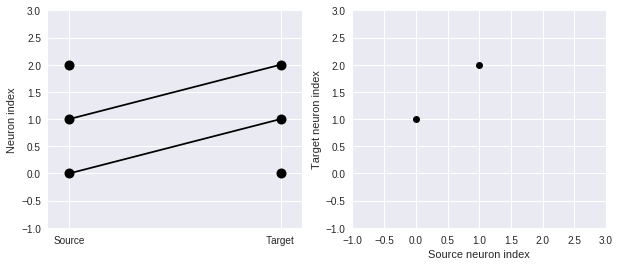

In [ ]:
#Synapses between two group  of neurones, initiator and conductors
plt.figure(dpi=144)
start_scope()

eqs='''
dv/dt=(Vmax-v)/tau:1
tau: second
Vmax:1
'''

# Helper function to show synapses between neurons
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

# Initiator group neurones, which start the process, they are 'receptors' and fire at a constant rate
IG = NeuronGroup(1,eqs,refractory=2*ms,threshold='v>-55',reset='v=-72') # প্রথম নিউরোন, যা সবসময় সংবেদ সর্বস্বটি করেই চলেছে
IG.Vmax=0
IG.v=-70
IG.tau=10*ms

# Conductor group of neurones, 3 in number
CG = NeuronGroup(3,eqs,refractory=2*ms,threshold='v>-55',reset='v=-72')
CG.Vmax = -70
# এদের Vmaxএবং v সমান, অর্থাৎ, বাইরে থেকে সংবেদ না এলে এরা নিজেরা কিছুই করবেনা 
# Note that Vmax and v are the same, thus they do not self fire and are dependent on external stimuli to fire
CG.v=-70
CG.tau=100*ms

# Synapses between IG & CG
SI = Synapses(IG,CG,'w:1',on_pre='v += w') 
# Synaptic transmission causes increase of voltage in the post
# synaptic neuron by an amount w
SI.connect(i=0,j=0) #Connect first IG neuron to first CG neuron
SI.delay = '1*ms'
SI.w = 5 # The voltage that is imparted on the post synaptic neuron

# Synapses between the conductor neurons, so that they can carry the impulse forward
SC=Synapses(CG,CG,'w:1',on_pre='v += w')
SC.connect(condition='abs(i-j)<2 and i<j') # Do not connect to self, only connect to other neurons
SC.w=5

visualise_connectivity(SC)

# Show voltage of each neuron
MI = StateMonitor(IG, 'v', record=True)
MC = StateMonitor(CG, 'v', record=True)



In [ ]:
#Run simulation
run(30*ms)

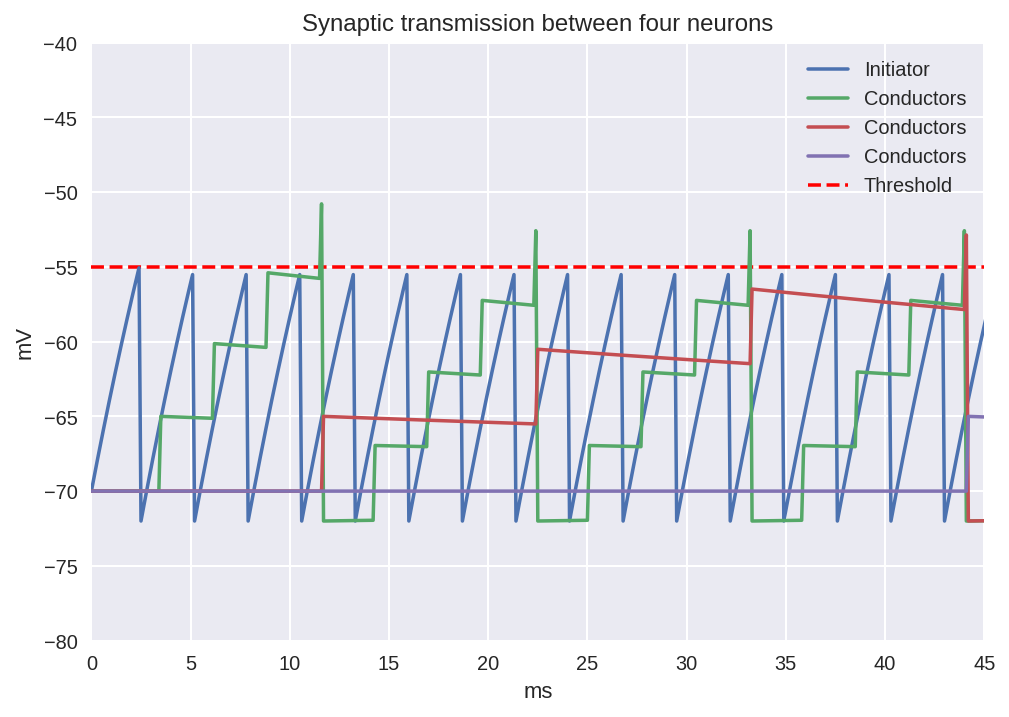

In [ ]:
plt.figure(dpi=72*2)
plt.title('Synaptic transmission between four neurons')
plot(MI.t/ms, MI.v[0],label='Initiator')
plot(MC.t/ms, MC.v.T,label='Conductors')
plt.xlim(0,45)
plt.ylim(-80,-40)
plt.xlabel('ms')
plt.ylabel('mV')
plt.hlines(y=-55,xmin=0,xmax=90,label='Threshold',color='r',linestyle='dashed')
legend(loc='best')
plt.show()

Note how the intitator keeps firing at a constant rate, thus kindling the conductors, until they begin to fire (and die down instantly). For example, the first conductor (green one), is seen to push towards threshold (-55mV) but can reach it only in three attempts (i.e. after continuous stimulation from initiator neuron). A wave is seen to progress from left to right through this rather inefficient, but time honored mechanism. 

### স্নায়ুসন্ধিতে অবদমন | Synaptic inhibitor

যদি এমন কোন সাইন্যাপ্স বানাই যাতে w ঋণাত্মক?

What if w is negative? In such a scenario, the presynaptic neuron will actively stop the postsynaptic neuron from reaching a peak, and pull it down.

The following shows 3 neurons: P -> Q is excitatory, P->R is also excitatory, However, R->Q is inhibitory. In effect, if P fires, it has a dual effect on Q, to both kindle and kill it! What finally happens depends on the respective _w_ of the connections.

In [ ]:
# Synaptic inhibitor
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

#Three neurons P, Q, R
P = NeuronGroup(1, eqs, threshold='v>-0.7', reset='v =-0.9', method='linear')
P.v = -0.9
P.I = 1
P.tau = 10*ms

Q = NeuronGroup(1, eqs, threshold='v>0.5', reset='v=-0.7', method='linear')
Q.I = 0
Q.v = -0.9
Q.tau = 10*ms

R = NeuronGroup(1, eqs, threshold='v>-0.5', reset='v=-0.9', method='linear')
R.I = 0
R.v = -0.9
R.tau = 20*ms

# Excitatory synapse, w is positive between P and Q
S1 = Synapses(P, Q ,'w : 1', on_pre='v_post += 0.5')
S1.connect(i=0, j=0)

# Inhibitory synapse, W is negative, thus R is always pulling down Q
S2 = Synapses(R, Q, 'w: 1', on_pre='v_post -= 0.5')
S2.connect(i=0,j=0)

# However, P has a positive influence on R!
S3 = Synapses(P , R, 'w: 1', on_pre='v_post += 0.3')
S3.connect(i=0,j=0)

M1 = StateMonitor(P, 'v', record=True)
M2 = StateMonitor(Q,'v', record=True)
M3 = StateMonitor(R,'v', record=True)
run(40*ms)


Text(0, 0.5, 'v')

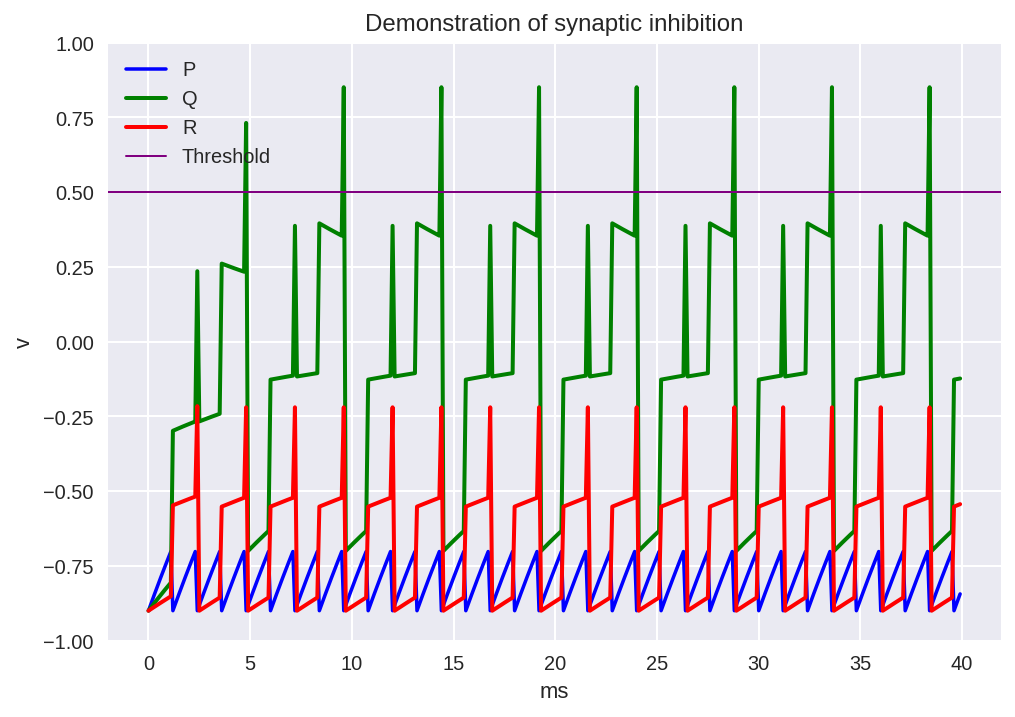

In [ ]:
plt.figure(dpi=144)
plt.ylim (-1,1)
plot(M1.t/ms, M1.v[0], '-b', label='P')
plot(M2.t/ms, M2.v[0], '-g', lw=2, label='Q')
plot(M3.t/ms, M3.v[0], '-r', lw=2, label='R')
plt.axhline(y=0.5, xmin=0, xmax=200, linewidth=1, color = 'purple', label='Threshold')
plt.title('Demonstration of synaptic inhibition')
plt.legend()
xlabel('ms')
ylabel('v')


When you look at it, you can see P firing at a constant rate (because it has no incoming connections from anybody else). R is stimulated by P and also fires at constant rate. Whether Q fires or not depends on the sum of P & R at any given moment. Thus behavior of Q is quite erratic (?biological)

Now if we introduce another neuron F, which is stmulated by Q (Q->F) but inhibits P (a negative feedback device')

In [ ]:
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

P = NeuronGroup(1, eqs, threshold='v>-0.7', reset='v =-0.9', method='linear')
P.v = -0.9
P.I = 1
P.tau = 10*ms

Q = NeuronGroup(1, eqs, threshold='v>0.5', reset='v=-0.7', method='linear')
Q.I = 0
Q.v = -0.9
Q.tau = 10*ms

R = NeuronGroup(1, eqs, threshold='v>-0.5', reset='v=-0.9', method='linear')
R.I = 0
R.v = -0.9
R.tau = 20*ms

F = NeuronGroup(1, eqs, threshold='v>-0.5', reset='v=-0.9', method='linear')
F.I = 0.9 
F.v = -0.9
F.tau = 16*ms

S1 = Synapses(P, Q ,'w : 1', on_pre='v_post += 0.5')
S1.connect(i=0, j=0)
S1.delay='1*ms'

S2 = Synapses(R, Q, 'w: 1', on_pre='v_post -= 0.5')
S2.connect(i=0,j=0)
S2.delay='1*ms'

S3 = Synapses(P , R, 'w: 1', on_pre='v_post += 0.3')
S3.connect(i=0,j=0)
S3.delay='1*ms'

S4 = Synapses(Q,F,'w:1',on_pre='v_post+=0.3')
S4.connect(i=0,j=0)
S4.delay='1*ms'

S5 = Synapses(F, P, 'w:1', on_pre='v_post -= 0.3')
S5.connect(i=0,j=0)
S5.delay='1*ms'

M1 = StateMonitor(P, 'v', record=True)
M2 = StateMonitor(Q,'v', record=True)
M3 = StateMonitor(R,'v', record=True)
M4 = StateMonitor(F,'v', record=True)
run(40*ms)

Text(0, 0.5, 'v')

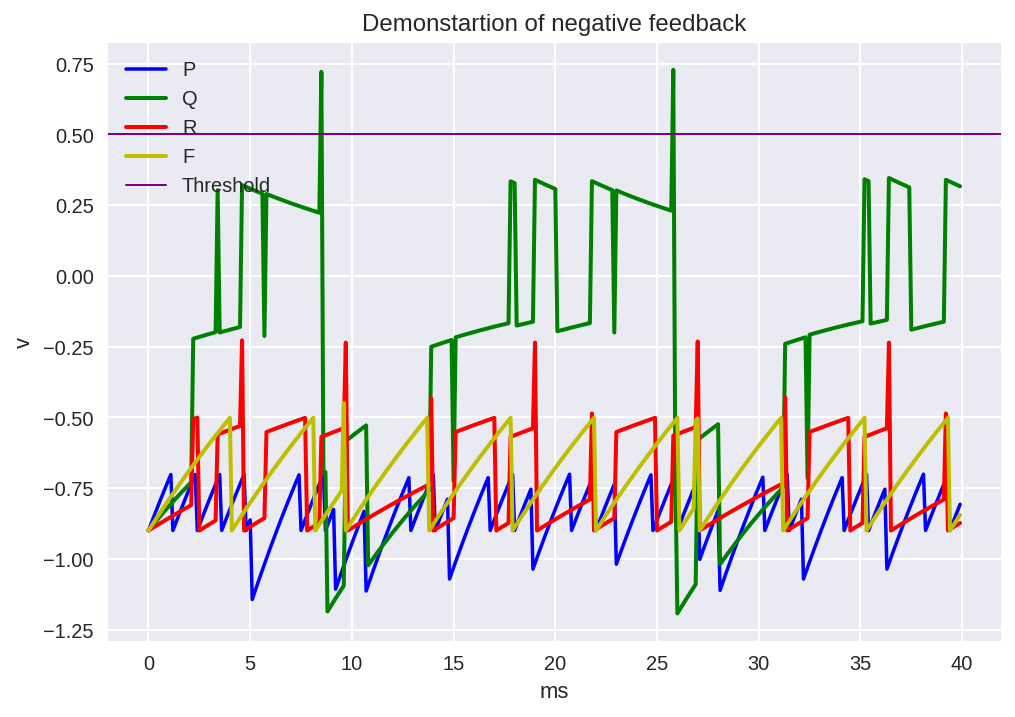

In [ ]:
plt.figure(dpi=72*2)
plot(M1.t/ms, M1.v[0], '-b', label='P')
plot(M2.t/ms, M2.v[0], '-g', lw=2, label='Q')
plot(M3.t/ms, M3.v[0], '-r', lw=2, label='R')
plot(M4.t/ms, M4.v[0], '-y', lw=2, label='F')
plt.title('Demonstartion of negative feedback')
plt.axhline(y=0.5, xmin=0, xmax=200, linewidth=1, color = 'purple',label='Threshold')
plt.legend()
xlabel('ms')
ylabel('v')

Now the output of the system (Q) looks quite erratic; with just four neurons, the thing has become kind of stochasttc.

মাত্র চারটে নিউরোনেই গোটা ব্যাপারটা জট পাকিয়ে যাচ্ছে । মন যেরকম জটালো ।

 Now if we increase the _w_ of F slowly, we notice something strange: the number of sparks in Q alternately shifts between very high and very low, until it settles into a plateau.

In [ ]:
ws = arange(0.1,1,0.1)
q_activations = []
for selected_w in ws:
  start_scope()

  eqs = '''
  dv/dt = (I-v)/tau : 1
  I : 1
  tau : second
  '''

  P = NeuronGroup(1, eqs, threshold='v>-0.7', reset='v =-0.9', method='linear')
  P.v = -0.9
  P.I = 1
  P.tau = 10*ms

  Q = NeuronGroup(1, eqs, threshold='v>0.5', reset='v=-0.7', method='linear')
  Q.I = 0
  Q.v = -0.9
  Q.tau = 10*ms

  R = NeuronGroup(1, eqs, threshold='v>-0.5', reset='v=-0.9', method='linear')
  R.I = 0
  R.v = -0.9
  R.tau = 20*ms

  F = NeuronGroup(1, eqs, threshold='v>-0.5', reset='v=-0.9', method='linear')
  F.I = 0.9 
  F.v = -0.9
  F.tau = 16*ms

  S1 = Synapses(P, Q ,'w : 1', on_pre='v_post += 0.5')
  S1.connect(i=0, j=0)
  S1.delay='1*ms'

  S2 = Synapses(R, Q, 'w: 1', on_pre='v_post -= 0.5')
  S2.connect(i=0,j=0)
  S2.delay='1*ms'

  S3 = Synapses(P , R, 'w: 1', on_pre='v_post += 0.3')
  S3.connect(i=0,j=0)
  S3.delay='1*ms'

  S4 = Synapses(Q,F,'w:1',on_pre='v_post+=0.3')
  S4.connect(i=0,j=0)
  S4.delay='1*ms'

  S5 = Synapses(F, P, 'w:1', on_pre='v_post -= %s' % selected_w)
  S5.connect(i=0,j=0)
  S5.delay='1*ms'

  M1 = StateMonitor(P, 'v', record=True)
  M2 = StateMonitor(Q,'v', record=True)
  M3 = StateMonitor(R,'v', record=True)
  M4 = StateMonitor(F,'v', record=True)
  run(40*ms)
  
  c = len([x for x in M2.v[0] if x > 0.5])
  q_activations.append(c)


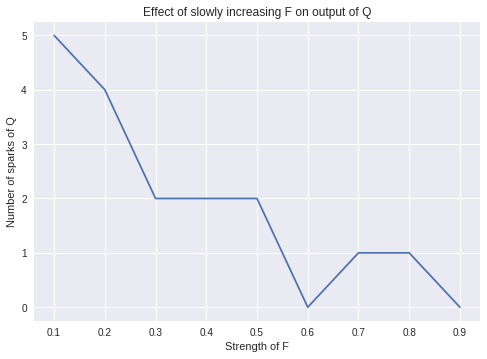

In [ ]:
plt.xlabel('Strength of F')
plt.ylabel('Number of sparks of Q')
plt.title('Effect of slowly increasing F on output of Q')
plt.plot(ws, q_activations)

এবার যদি নিউরোনের সংখ্যা বাড়াই, তাহলে স্থানে ও কালে (spatial and temporal), দু রকমভাবেই ঘাত যোগ হতে থাকবে । 

With increase in neurons, they will interact with each other

1. in space - neurons connected to each other will add / subtract voltages
2. in time - because a change in voltage pushes/ pulls down a neuron from threshold, the effecs also sum up over time

"\nplot(M1.t/ms, M1.v[0], '-b', label='Stim')\nplot(M2.t/ms, M2.v[0], '-g', lw=2, label='Ex')\nplot(M3.t/ms, M3.v[0], '-r', lw=2, label='Inh')\nplot(M4.t/ms, M4.v[0], '-y', lw=2, label='Feed')\nplt.axhline(y=0.5, xmin=0, xmax=200, linewidth=1, color = 'purple')\nxlabel('ms')\nylabel('v')\n"

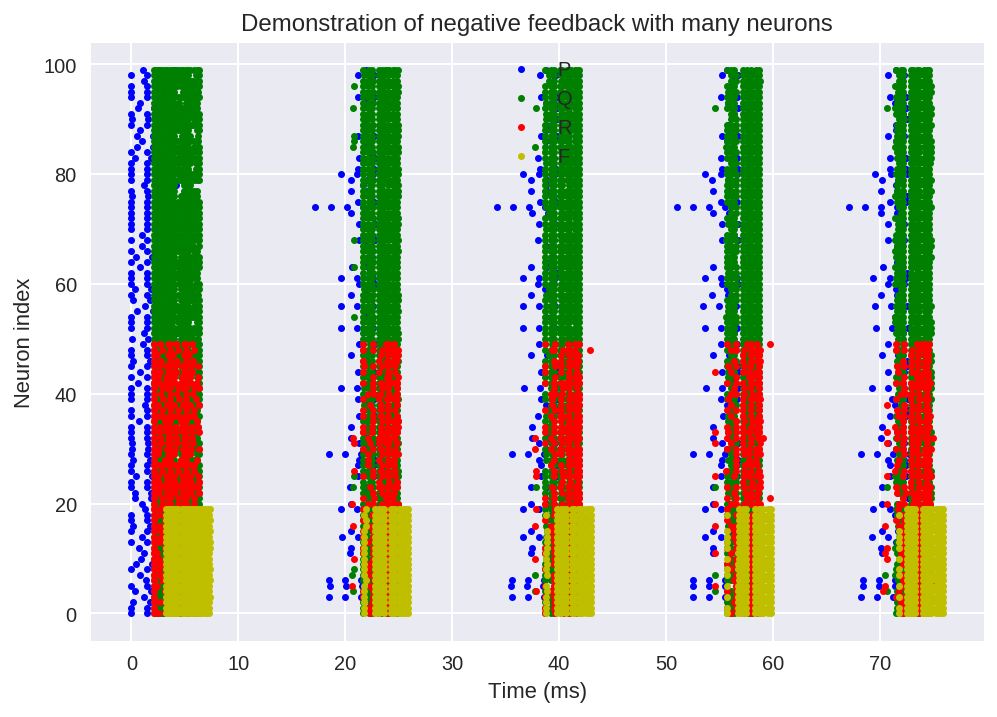

In [ ]:
plt.figure(dpi=144)
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

# We replicate the same expereiments with not one but 100 neurons in each group
P = NeuronGroup(100, eqs, threshold='v>0.5', reset='v=0', method='linear')
P.v = 'rand()'
P.I = 2
P.tau = 5*ms


Q = NeuronGroup(100, eqs, threshold='v>0.4', reset='v=0', method='linear')
Q.I = 0
Q.v = 0
Q.tau = 10*ms

R = NeuronGroup(50, eqs, threshold='v>0.8', reset='v=0', method='linear')
R.I = 0
R.v = 0
R.tau = 20*ms

F = NeuronGroup(20, eqs, threshold='v>0.5', reset='v=0', method='linear')
F.I = 0 
F.v = 0
F.tau = 20*ms

S1 = Synapses(P, Q ,'w : 1', on_pre='v_post += 0.3')
S1.connect(condition='i!=j',p=0.7)
S1.delay='2*ms'

S2 = Synapses(R, Q, 'w: 1', on_pre='v_post -= 0.1')
S2.connect(condition='i!=j',p=0.3)
S2.delay='2*ms'

S3 = Synapses(P , R, 'w: 1', on_pre='v_post += 0.2')
S3.connect(condition='i!=j',p=0.3)
S3.delay='2*ms'

S4 = Synapses(Q, F, 'w:1', on_pre='v_post += 0.3')
S4.connect(condition='i!=j',p=0.4)
S4.delay=1*ms

S5 = Synapses(F,P,'w:1',on_pre='v_post -= 0.2')
S5.connect(condition='i!=j',p=0.4)
S5.delay=1*ms

M1 = StateMonitor(P, 'v', record=True)
M2 = StateMonitor(Q,'v', record=True)
M3 = StateMonitor(R,'v', record=True)
M4 = StateMonitor(F,'v', record=True)

# The spikemonitor objects plots each spike as a dot, convenient for many neurons
SM1 = SpikeMonitor(P)
SM2 = SpikeMonitor(Q)
SM3 = SpikeMonitor(R)
SM4 = SpikeMonitor(F)

run(80*ms)

plot(SM1.t/ms, SM1.i, '.b', label='P')
plot(SM2.t/ms, SM2.i, '.g',label='Q')
plot(SM3.t/ms, SM3.i, '.r',label='R')
plot(SM4.t/ms, SM4.i, '.y',label='F')
plt.title('Demonstration of negative feedback with many neurons')
xlabel('Time (ms)')
ylabel('Neuron index')
plt.legend()

'''
plot(M1.t/ms, M1.v[0], '-b', label='Stim')
plot(M2.t/ms, M2.v[0], '-g', lw=2, label='Ex')
plot(M3.t/ms, M3.v[0], '-r', lw=2, label='Inh')
plot(M4.t/ms, M4.v[0], '-y', lw=2, label='Feed')
plt.axhline(y=0.5, xmin=0, xmax=200, linewidth=1, color = 'purple')
xlabel('ms')
ylabel('v')
'''

P (blue) starts firing, Q (green) follows, after then R (red) kicks in (which is also stimulated by P), and also F (yellow) which inhibits P, and it takes a while before the whole thing dies, to reappear again after 15 ms. A kind of temporal pattern is generated.

## যোগ (Summation)

দুটো নিউরোন যদি  কোন একটি তৃতীয় নিউরোনের সাথে  সাইন্যাপস  করে, তবে তার action potential  এর  সংখ্যার  যোগফলই তাদের যোগফল ।  (আক্ষরিক অর্থে, এভাবেই যোগ করার  উপায়, অন্তত এই মডেলে )

Do biological neurones qualify as Turing machines? We'll, you can make a little adder circuit out of them. But there is a significant point of departure from electronic circuits. Neurones are stateless, there are no 'registers' to hold a variable. In fact, the neurone _is_ the smallest possible unit, and the only thing they can do is generate a spike. So addition can be carried out only as an emergent phenomenon of three neurons.



"\nplot(M1.t/ms,M1.v[0],'-r',label='N1')\nplot(M2.t/ms,M2.v[0],'-g',label='N2')\nplot(M3.t/ms,M3.v[0],'-k',label='SUM')\n"

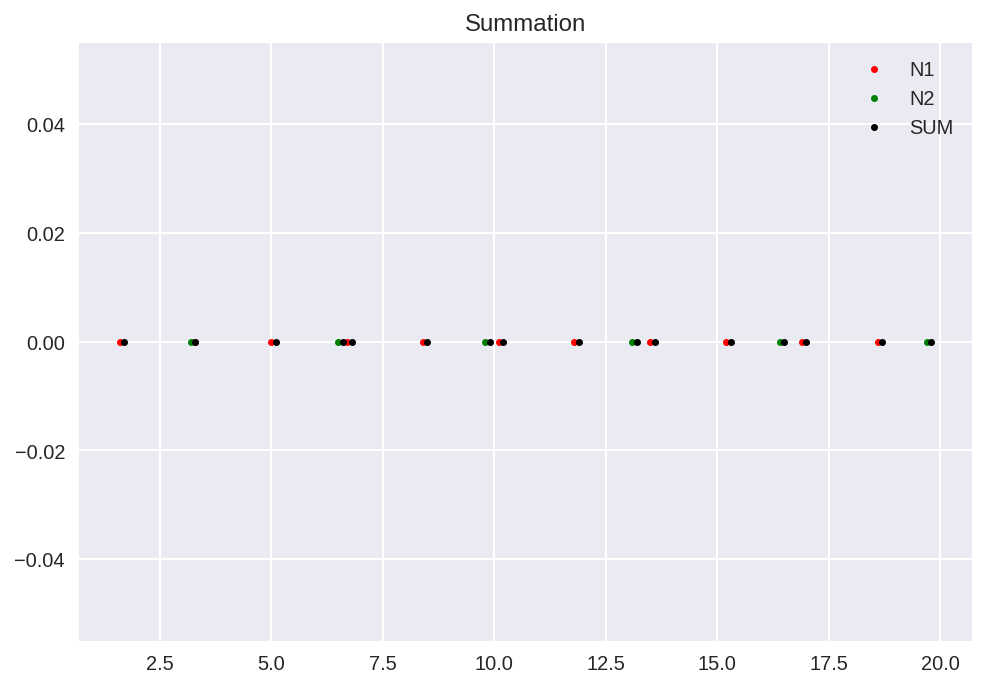

In [ ]:
#An adder circuit
plt.figure(dpi=72*2)
start_scope()

eqs = eqs = '''
dv/dt = (I-v)/tau : 1
I:1
tau : second
'''

# First number, represented by spikes on a neuron/ milisecond
N1 = NeuronGroup(1,eqs,threshold='v>0.8',reset='v=0')

# Second number
N2 = NeuronGroup(1,eqs,threshold='v>0.8',reset='v=0')

# Sum neuron
SUM = NeuronGroup(1,eqs,threshold='v>0.3',reset='v=0')

# Set frequency of first neuron
N1.tau = 1*ms
N1.I = 1

# Set frequency of second neuron
N2.tau=2*ms
N2.I = 1

# The sum will not fire intrinsically, but only on stimulus
SUM.tau=1*ms
SUM.I = 0
SUM.v = 0

# Connect N1 -> S
S1 = Synapses(N1,SUM, 'w:1', on_pre='v_post += 0.5')
S1.connect()

# Connect N2 -> S
S2 = Synapses(N2,SUM, 'w:1', on_pre='v_post += 0.5')
S2.connect()

#SUM will fire if it receives a stimulus eitherfrom N1 or N2

M1 = StateMonitor(N1, 'v', record=True)
M2 = StateMonitor(N2, 'v', record=True)
M3 = StateMonitor(SUM, 'v', record=True)

SM1 = SpikeMonitor(N1)
SM2 = SpikeMonitor(N2)
SM3 = SpikeMonitor(SUM)

run(20*ms)

plt.title('Summation')

plot(SM1.t/ms,SM1.i,'.r',label='N1')
plot(SM2.t/ms,SM2.i,'.g',label='N2')
plot(SM3.t/ms,SM3.i,'.k',label='SUM')
plt.legend()

'''
plot(M1.t/ms,M1.v[0],'-r',label='N1')
plot(M2.t/ms,M2.v[0],'-g',label='N2')
plot(M3.t/ms,M3.v[0],'-k',label='SUM')
'''

Now the number of red dots (N1) + green dots (N2) = black dots (SUM) (approx). The accuracy is an average one, and will only increase with duration of runtime.

## কিছু প্রতিপাদ্য | Some corollaries

### শর্তাধীন প্রতিক্রিয়া | Conditioning

1. Unconditioned stimulues ('নিঃশর্ত সংবেদ') নামক নিউরোন থেকে Unconditioned response (' নিঃশর্ত প্রতিক্রিয়া') সাইন্যাপ্স নিজের মত, স্বাভাবিক ভাবেই কাজ করে ( খাবার -> জিভে জল) ।
2. Conditioned stimulus  ('শর্তাধীন সংবেদ',  অর্থাৎ ঘণ্টা) কিছুক্ষণ US এর সাথে দিয়ে conditioning  করতে হবে (একই সাথে খাবার এবং ঘণ্টা)
3. তারপর CS এর সাথে UR এর একটা সম্পর্ক তৈরি হবে, যাকে বলব condiotoned response (CR) - অর্থাৎ ঘণ্টা বাজালেই জিভে জল

An 'unconditioned reposne' (Pavolv-esque) is a natural response to stimuli like food-> salivation. 

Unconditioned stimulus (US) -> Unconditioned response (UR)

Such synapses are built in. A 'conditioned response' (bell -> salivation) has to be programmed, it does not exist naturally.

Conditioning stimulus (CS) -> NULL

The aim is to produce

CS -> CR

by stimulating with US and CS together (i.e. the food and teh bell at the same time), so that after a while such an effect ('conditioning') is established.

#### প্রারব্ধ (persistence) এবং নিউরোন 

US+CS এর দ্বারা কতবার সংবেদন  পাওয়ার  পর এই কন্ডিশনিং হবে?  অর্থাৎ ঘণ্টা আর খাবার কতবার একসাথে দিলে কন্ডিশনিং শেষ হবে?

* UR,  বাকি সবার মতই, একটা  পাতি  নিউরোন । এর মধ্যে এমন কোন স্মৃতিকণা নেই, যা মনে রাখবে 'আমি কতবার ঘণ্টা আর খাবার একসাথে পেয়েছি ' । বা থাকলেও আমরা জানিনা ।
* যদি  বা থাকেও, সেটাকে ব্যবহার করা  উচিত  হবেনা । কারণ state variable,  অর্থাৎ যে রাশির একটা ইতিহাস আছে  ( যেমন 'ধরে নিই US+CS  থেকে,x  বার সংবেদ এসেছে ') নিউরাল নেটওয়ার্কে তারা অবান্তর। কারণ, নিউরাল নেটয়ার্কের মূল কথাটাই  হলও, নিউরোনের চেয়ে ছোট কোনকিছু আমরা চিন্তাই করবোনা । 

এক্ষেত্রে  উপায়  হল  CR  বলে  আরেকটা  নিউরোন  তৈরি করা, যার threshold  এ  পৌছতে  সময়  কত লাগবে , সেটা ঠিক করে দেবে CS থেকে একটা  সাইন্যাপস , এবং US  থেকে আসা অবদমক নিউরোন।  বস্তুত, এই অবদমক নিউরোন INH কেই গণক  (counter variable) হিসাবে  ব্যবহার করতে হবে (পাভলভের ব্যাখ্যা অবশ্য এর থেকে আলাদা) । 

প্রতিবার US + CS থেকে একসাথে  সংবেদ  এলে  তবেই আসতে  আসতে  CR  এর বিভব v একসময় INH  এর  বাধা কাটিয়ে  চৌকাঠ পার করবে

Because neurons do not have state variables, we can model the process of conditioning with an inhibitory neuron INH. The interaction of US, CS, INH and CR will determine after how many co-stimuli with US+CS will conditioning be achieved.


INFO       No numerical integration method specified for group 'neurongroup_14', using method 'exact' (took 0.02s). [brian2.stateupdaters.base.method_choice]


Starting simulation at t=0. s for a duration of 200. ms
0.2 (100%) simulated in < 1s
Conditioning achieved


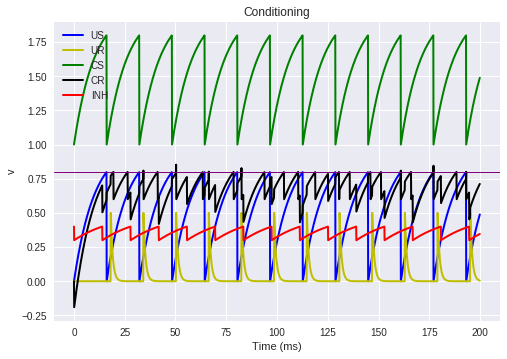

In [ ]:
# Conditioning

start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

# Unconditioned stimulus - i.e. food
US = NeuronGroup(1, eqs, threshold='v>0.8', reset='v=0', method='linear')
US.v = 0
US.I = 1
US.tau = 10*ms

# Unconditioned response - salivation
UR = NeuronGroup(1, eqs, threshold='v>0.6', reset='v=0', method='linear')
UR.I = 0
UR.v = 0
UR.tau = 1*ms

# Conditioning stimulus - bell
CS = NeuronGroup(1, eqs, threshold='v>1.8', reset='v=1', method='linear',refractory=2*ms)
CS.I = 2
CS.v = 1
CS.tau = 10*ms

# Conditioned response - another neuron which also causes salivation
CR = NeuronGroup(1,eqs, threshold='v>0.8',reset='v=0.6', method='linear',refractory=2*ms)
CR.I = 1
CR.v = 0
CR.tau = 10*ms

#Inhibitory interneuro
INH = NeuronGroup(1,eqs, threshold='v>0.4', reset = 'v=0.3',refractory=2*ms)
INH.I = 0.5
INH.v = 0.4
INH.tau = 20*ms

# Set synapses
# US -> UR positive
S_US_UR = Synapses(US, UR ,'w : 1', on_pre='v_post += 0.5')
S_US_UR.connect(i=0, j=0)
S_US_UR.delay=2*ms

# CS->CR positive
S_CS_CR = Synapses(CS, CR, 'w : 1', on_pre='v_post +=0.06')
S_CS_CR.connect(i=0,j=0)
S_CS_CR.delay = 2*ms

# US-> CR positive
S_US_CR = Synapses(US, CR, 'w:1', on_pre='v_post += 0.05')
S_US_CR.connect(i=0,j=0)

# INH -> CR negative
S_INH_CR = Synapses(INH, CR, 'w:1', on_pre='v_post -= 0.2')
S_INH_CR.connect(i=0,j=0)


M1 = StateMonitor(US, 'v', record=True)
M2 = StateMonitor(UR, 'v', record=True)
M3 = StateMonitor(CS, 'v', record=True)
M4 = StateMonitor(CR, 'v', record=True)
M5 = StateMonitor(INH,'v', record=True)

SM1 = SpikeMonitor(US)
SM2 = SpikeMonitor(UR)
SM3 = SpikeMonitor(CS)
SM4 = SpikeMonitor(CR)
SM5 = SpikeMonitor(INH)
run(200*ms,report='text')

#plot(M1.t/ms, M1.v[0], '-b', label='US')
'''plot(SM1.t/ms,SM1.i,'.',label='US')
plot(SM2.t/ms,SM2.i,'.',label='UR')
plot(SM3.t/ms,SM3.i,'.',label='CS')
plot(SM4.t/ms,SM4.i,'.',label='CR')
'''
plot(M1.t/ms, M1.v[0], '-b', lw=2, label='US')
plot(M2.t/ms, M2.v[0], '-y', lw=2, label='UR')
plot(M3.t/ms, M3.v[0], '-g', lw=2, label='CS')
plot(M4.t/ms, M4.v[0], '-k', lw=2, label='CR')
plot(M5.t/ms, M5.v[0], '-r', lw=2, label='INH')
#plot(SM5.t/ms,SM5.i,'.',label='INH')
plt.axhline(y=0.8, xmin=0, xmax=200, linewidth=1, color = 'purple')

plt.title('Conditioning')
xlabel('Time (ms)')
ylabel('v')
legend(loc='best')

conditioning_achieved=0
for x in M4.v[0]: # See whether CR has ever crossed threshold, which means conditioning is achieved
    if x >= 0.8:
        conditioning_achieved = 1
        S3 = Synapses(CS,UR, 'w:1', on_pre='v_post += 0.5')
        S3.connect(i=0,j=0)
        S2.delay=3*ms
        print("Conditioning achieved")
        break
if conditioning_achieved!=1:
    print("Conditioning not achieved")


#### Extinction

এই  মডেল থেকে দেখা যাচ্ছে CS + US  একসাথে না  এলে INH  এতই  প্রবল হয়ে পড়বে  যে  একসময় CR  তার চৌকাঠ  থেকে অনেক নিচে নেমে আসবে ।

If the co-stimuli is absent for a long time (i.e. the bell is heard without the food), the conditioning is lost (CR drops down much below its threshold). because of inhibitory effects of INH.

INFO       No numerical integration method specified for group 'neurongroup_19', using method 'exact' (took 0.02s). [brian2.stateupdaters.base.method_choice]


Starting simulation at t=0. s for a duration of 0.8 s
0.8 (100%) simulated in 1s


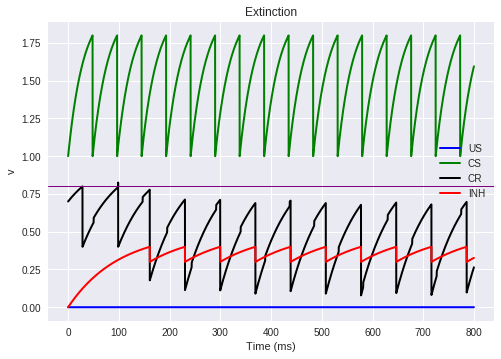

In [ ]:
# Extinction

start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

#We stop US this time with a very low frequency of firing (high tau)

US = NeuronGroup(1, eqs, threshold='v>0.8', reset='v=0', method='linear')
US.v = 0
US.tau=100*ms
US.I = 0

UR = NeuronGroup(1, eqs, threshold='v>0.6', reset='v=0', method='linear')
UR.I = 0
UR.v = 0
UR.tau = 1*ms

CS = NeuronGroup(1, eqs, threshold='v>1.8', reset='v=1', method='linear',refractory=2*ms)
CS.I = 2
CS.v = 1
CS.tau = 30*ms

CR = NeuronGroup(1,eqs, threshold='v>0.8',reset='v=0.4', method='linear',refractory=2*ms)
CR.I = 1
CR.v = 0.7
CR.tau = 70*ms

INH = NeuronGroup(1,eqs, threshold='v>0.4', reset = 'v=0.3',refractory=2*ms)
INH.I = 0.5
INH.v = 0
INH.tau = 100*ms

S_US_UR = Synapses(US, UR ,'w : 1', on_pre='v_post += 0.5')
S_US_UR.connect(i=0, j=0)
S_US_UR.delay=2*ms

S_CS_CR = Synapses(CS, CR, 'w : 1', on_pre='v_post +=0.03')
S_CS_CR.connect(i=0,j=0)
S_CS_CR.delay = 2*ms

S_US_CR = Synapses(US, CR, 'w:1', on_pre='v_post += 0.07')
S_US_CR.connect(i=0,j=0)

S_INH_CR = Synapses(INH, CR, 'w:1', on_pre='v_post -= 0.6')
S_INH_CR.connect(i=0,j=0)



M1 = StateMonitor(US, 'v', record=True)
M2 = StateMonitor(UR, 'v', record=True)
M3 = StateMonitor(CS, 'v', record=True)
M4 = StateMonitor(CR, 'v', record=True)
M5 = StateMonitor(INH,'v', record=True)

SM1 = SpikeMonitor(US)
SM2 = SpikeMonitor(UR)
SM3 = SpikeMonitor(CS)
SM4 = SpikeMonitor(CR)
SM5 = SpikeMonitor(INH)
run(800*ms,report='text')

#plot(M1.t/ms, M1.v[0], '-b', label='US')
'''plot(SM1.t/ms,SM1.i,'.',label='US')
plot(SM2.t/ms,SM2.i,'.',label='UR')
plot(SM3.t/ms,SM3.i,'.',label='CS')
plot(SM4.t/ms,SM4.i,'.',label='CR')
'''
plot(M1.t/ms, M1.v[0], '-b', lw=2, label='US')
#plot(M2.t/ms, M2.v[0], '-y', lw=2, label='UR')
plot(M3.t/ms, M3.v[0], '-g', lw=2, label='CS')
plot(M4.t/ms, M4.v[0], '-k', lw=2, label='CR')
plot(M5.t/ms, M5.v[0], '-r', lw=2, label='INH')
#plot(SM4.t/ms,SM4.i,'b=k',label='INH')
plt.axhline(y=0.8, xmin=0, xmax=200, linewidth=1, color = 'purple')
plt.title('Extinction')
xlabel('Time (ms)')
ylabel('v')
legend(loc='best')